In [1]:
import tensorflow as tf # type: ignore
from tensorflow import keras # type: ignore
from keras import Sequential # type: ignore
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout # type: ignore

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=10,
    image_size=(15,15)
)

NotFoundError: Could not find directory train

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=10,
    image_size=(15,15)
)

Found 1218 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)

test_ds = test_ds.map(process)




In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(15,15,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 batch_normalization_3 (Batc  (None, 4, 4, 64)         256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
488/488 [==============================] - 7s 12ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.1068 - val_accuracy: 0.9729
Epoch 2/10
488/488 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0338 - val_accuracy: 0.9901
Epoch 3/10
488/488 [==============================] - 2s 4ms/step - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0.0321 - val_accuracy: 0.9901
Epoch 4/10
488/488 [==============================] - 2s 4ms/step - loss: 3.6755e-04 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9918
Epoch 5/10
488/488 [==============================] - 2s 5ms/step - loss: 2.0872e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9967
Epoch 6/10
488/488 [==============================] - 2s 5ms/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 7/10
488/488 [==============================] - 2s 4ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0440 - val_accuracy: 0.98

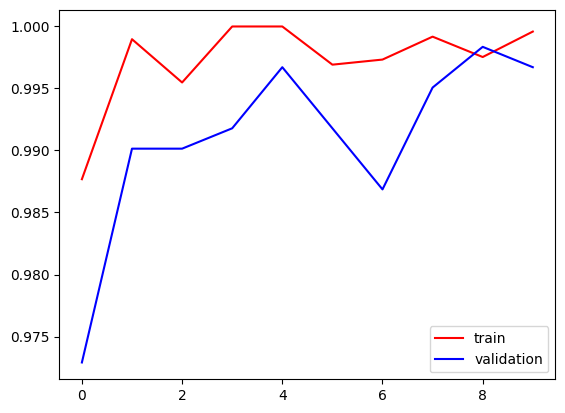

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

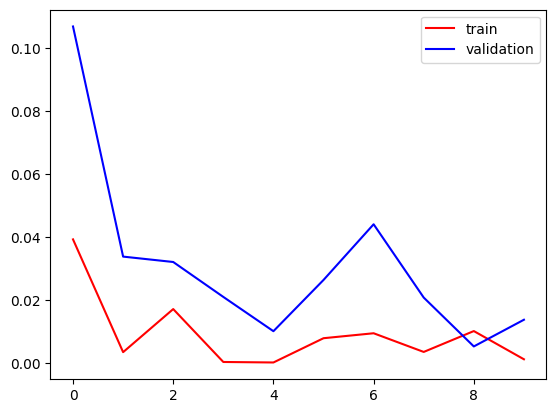

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('./model.pkl','wb'))